In [217]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder , QuantileTransformer
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram 
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
import seaborn as sns
import scipy.cluster.hierarchy as shc

In [138]:
df = pd.read_csv('/Users/raidneghiz/Documents/unsupervised_learning_clustering/Credit_card_dataset.csv')
df.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [139]:
df.shape

(8950, 6)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [141]:
df.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


In [142]:
df.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [143]:
df.isna().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [144]:
df.dropna(axis= 0 , inplace= True)

In [145]:
df.isna().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         0
CASH_ADVANCE         0
dtype: int64

In [146]:
df.dtypes

CUST_ID               object
BALANCE_FREQUENCY    float64
PURCHASES            float64
PAYMENTS             float64
CREDIT_LIMIT         float64
CASH_ADVANCE         float64
dtype: object

In [147]:
df['CUST_ID'] = df['CUST_ID'].str.slice(start=1)

In [148]:
df['CUST_ID']

0       10001
1       10002
2       10003
3       10004
4       10005
        ...  
8945    19186
8946    19187
8947    19188
8948    19189
8949    19190
Name: CUST_ID, Length: 8949, dtype: object

In [149]:
df['CUST_ID'] = df['CUST_ID'].astype(int)

In [150]:
df.dtypes

CUST_ID                int64
BALANCE_FREQUENCY    float64
PURCHASES            float64
PAYMENTS             float64
CREDIT_LIMIT         float64
CASH_ADVANCE         float64
dtype: object

<Axes: >

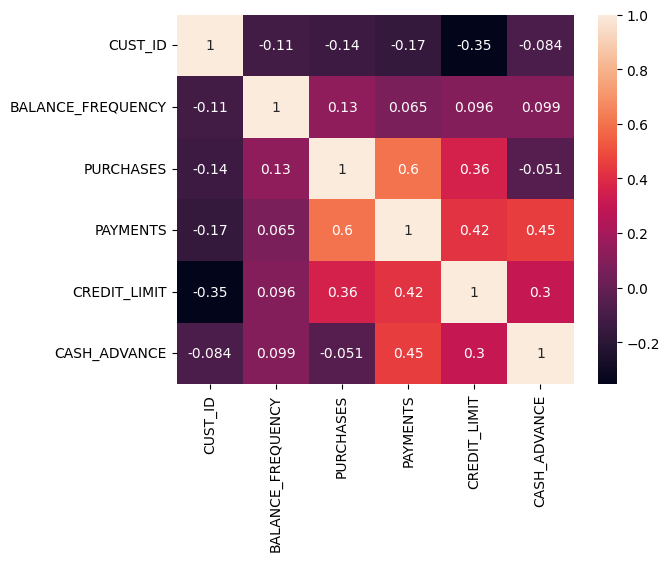

In [151]:
correlation = df.corr()
sns.heatmap(correlation , annot=True)

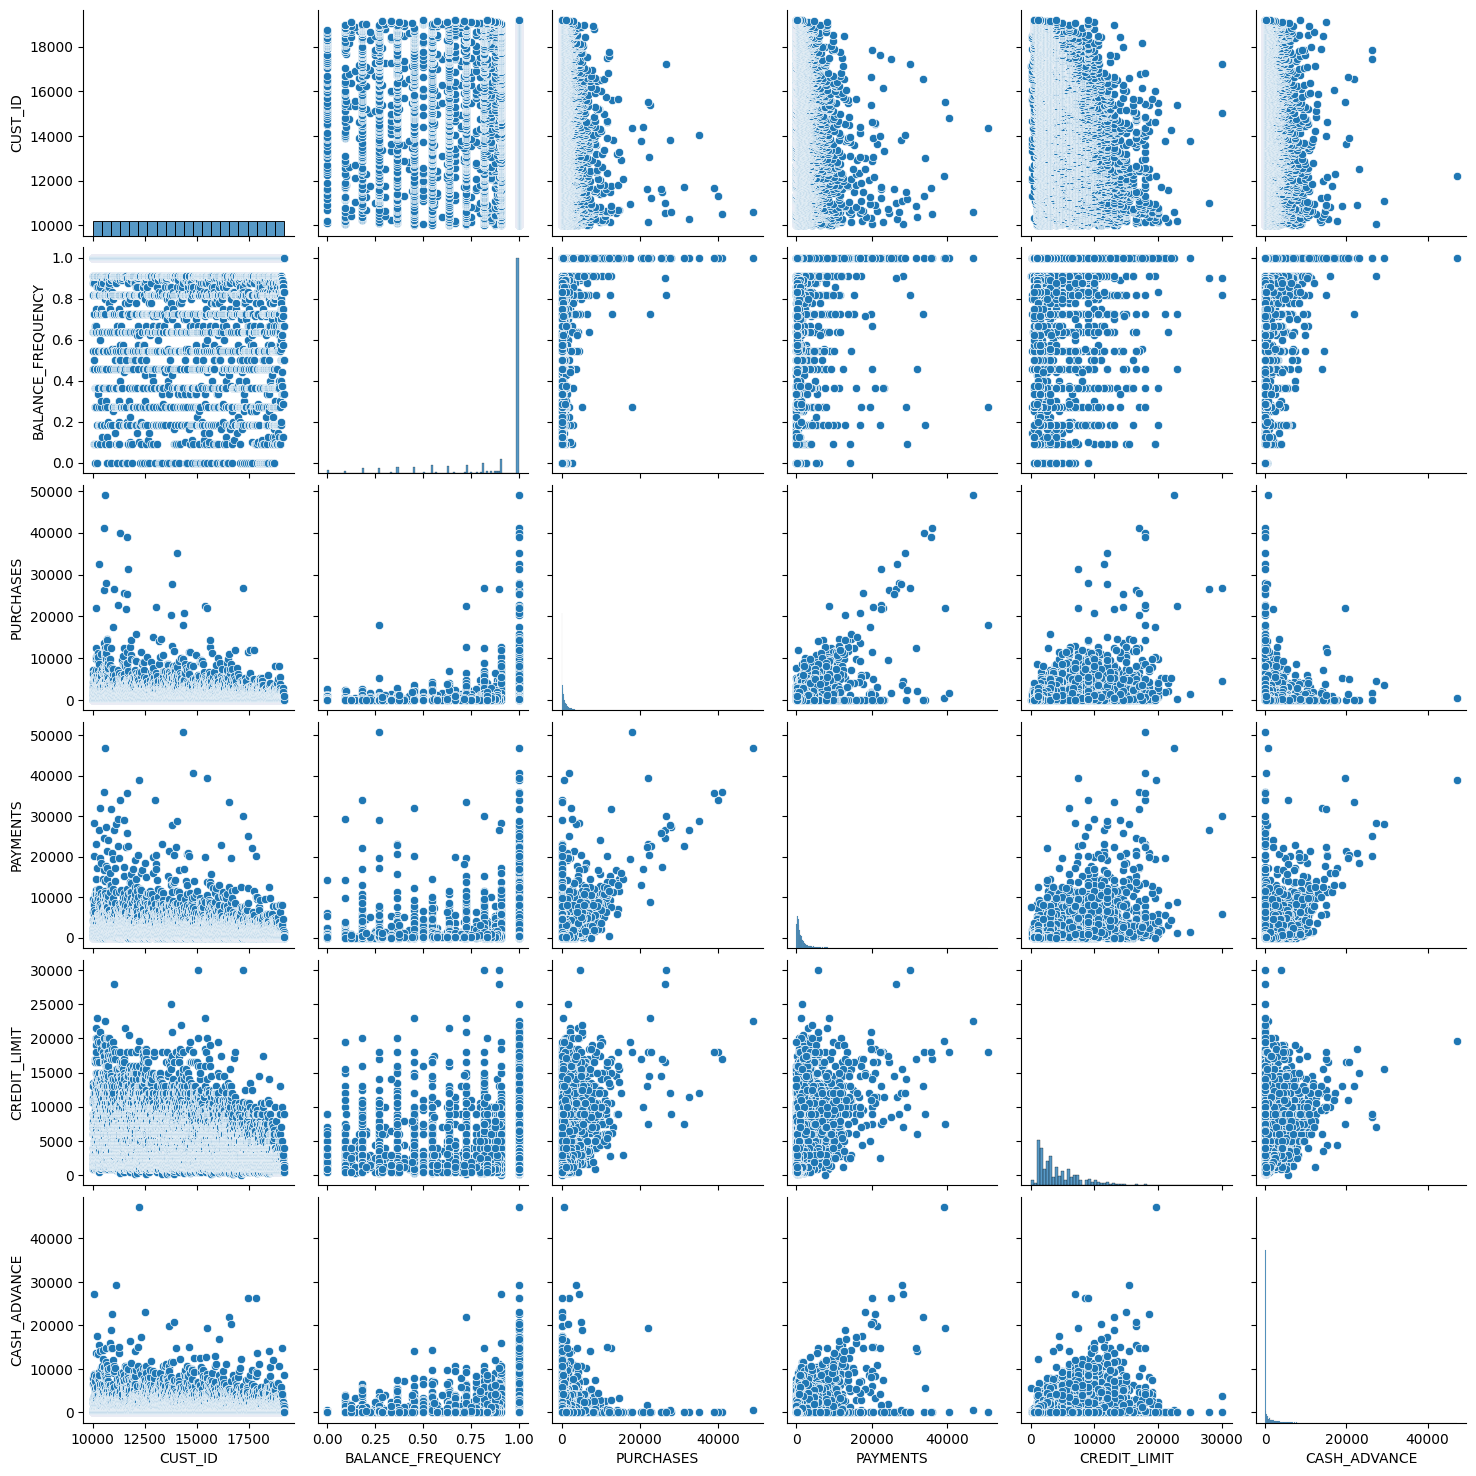

In [152]:
sns.pairplot(df)

In [153]:
def plots(df):
    figure = make_subplots(2,3)
    for i , column in enumerate(df.columns) :
        row = (i//3)+1
        col = (i%3)+1
        figure.add_trace(go.Box(y=df[column] , name= column) , row= row , col= col)
    figure.update_layout(width = 1000 , showlegend = False)
    figure.show()

plots(df)

In [188]:
df1 =df.copy()


In [189]:
df1 = df1.drop(columns = 'CUST_ID')
df1

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,0.818182,95.40,201.802084,1000.0,0.000000
1,0.909091,0.00,4103.032597,7000.0,6442.945483
2,1.000000,773.17,622.066742,7500.0,0.000000
3,0.636364,1499.00,0.000000,7500.0,205.788017
4,1.000000,16.00,678.334763,1200.0,0.000000
...,...,...,...,...,...
8945,1.000000,291.12,325.594462,1000.0,0.000000
8946,1.000000,300.00,275.861322,1000.0,0.000000
8947,0.833333,144.40,81.270775,1000.0,0.000000
8948,0.833333,0.00,52.549959,500.0,36.558778


In [190]:
q = QuantileTransformer()

df1 = q.fit_transform(df1)
df1

array([[0.21371371, 0.30635659, 0.11733158, 0.05855856, 0.        ],
       [0.28278278, 0.        , 0.90734227, 0.78928929, 0.97371478],
       [1.        , 0.66828812, 0.39854256, 0.82182182, 0.        ],
       ...,
       [0.23273273, 0.34633865, 0.046449  , 0.05855856, 0.        ],
       [0.23273273, 0.        , 0.03491602, 0.01001001, 0.5238642 ],
       [0.16166166, 0.74637688, 0.03888283, 0.12862863, 0.56371072]])

In [191]:
df1 = pd.DataFrame(df1 , columns=['BALANCE_FREQUENCY' , 'PURCHASES' ,'PAYMENTS' , 'CREDIT_LIMIT' , 'CASH_ADVANCE' ])
df1

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,0.213714,0.306357,0.117332,0.058559,0.000000
1,0.282783,0.000000,0.907342,0.789289,0.973715
2,1.000000,0.668288,0.398543,0.821822,0.000000
3,0.147648,0.811490,0.000000,0.821822,0.592325
4,1.000000,0.233496,0.425604,0.128629,0.000000
...,...,...,...,...,...
8944,1.000000,0.455788,0.208798,0.058559,0.000000
8945,1.000000,0.461962,0.167432,0.058559,0.000000
8946,0.232733,0.346339,0.046449,0.058559,0.000000
8947,0.232733,0.000000,0.034916,0.010010,0.523864


In [192]:
new_df = pd.concat([df['CUST_ID'] , df1] ,  axis= 1 , join= 'inner')
new_df

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,10001,0.213714,0.306357,0.117332,0.058559,0.000000
1,10002,0.282783,0.000000,0.907342,0.789289,0.973715
2,10003,1.000000,0.668288,0.398543,0.821822,0.000000
3,10004,0.147648,0.811490,0.000000,0.821822,0.592325
4,10005,1.000000,0.233496,0.425604,0.128629,0.000000
...,...,...,...,...,...,...
8944,19185,1.000000,0.455788,0.208798,0.058559,0.000000
8945,19186,1.000000,0.461962,0.167432,0.058559,0.000000
8946,19187,0.232733,0.346339,0.046449,0.058559,0.000000
8947,19188,0.232733,0.000000,0.034916,0.010010,0.523864


In [193]:
def plots(df):
    figure = make_subplots(2,3)
    for i , column in enumerate(df.columns) :
        row = (i//3)+1
        col = (i%3)+1
        figure.add_trace(go.Box(y=df[column] , name= column) , row= row , col= col)
    figure.update_layout(width = 1000 , showlegend = False)
    figure.show()

plots(new_df)

#### **AGGLOMERATIVE**

In [220]:
model=AgglomerativeClustering(n_clusters=6 , linkage='complete')

In [221]:
model.fit(new_df)

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [222]:
clust_labels = model.fit_predict(new_df)

In [223]:
clusters = pd.DataFrame(clust_labels)
clusters

,0
0,0
1,0
2,0
3,0
4,0
...,...
8943,5
8944,5
8945,5
8946,5


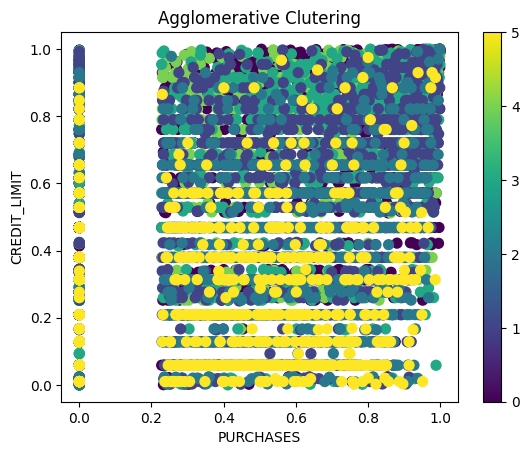

In [224]:
fig =plt.figure()

ax = fig.add_subplot(111)

scatter = ax.scatter (new_df ['PURCHASES'] , new_df ["CREDIT_LIMIT"] , c= clusters[0], s=50)

ax.set_title("Agglomerative Clutering")

ax.set_xlabel("PURCHASES")

ax.set_ylabel("CREDIT_LIMIT")

plt.colorbar(scatter)

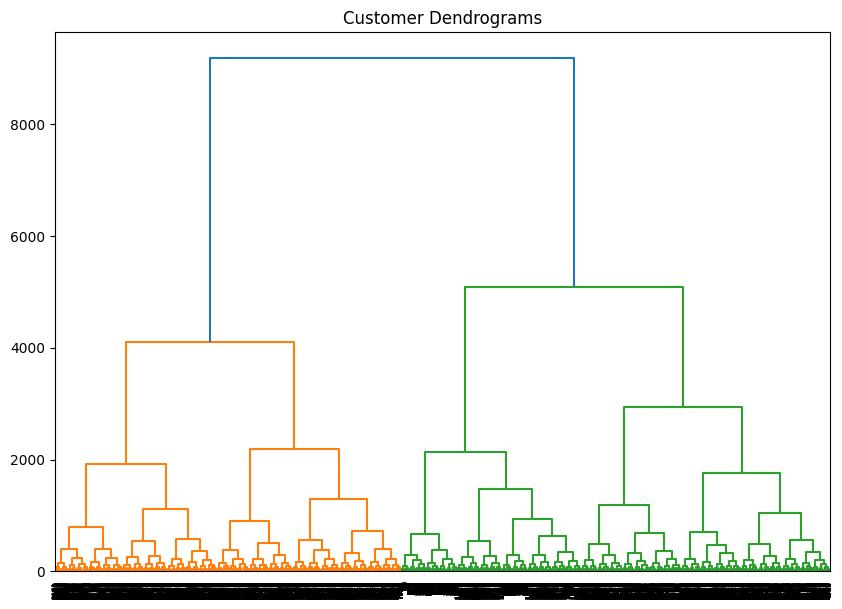

In [225]:
plt.figure(figsize=(10,7))

plt.title("Customer Dendrograms")

dend=shc.dendrogram(shc.linkage(new_df, method="complete"))

#### **K-MEANS**

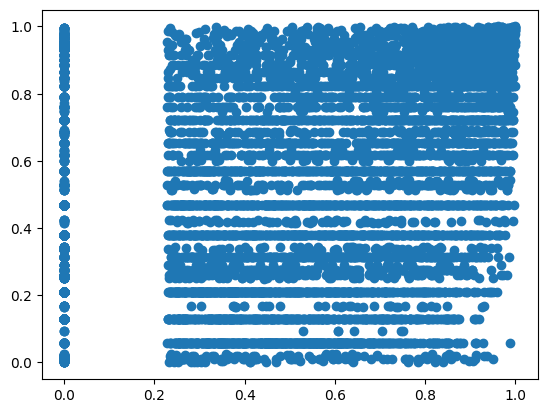

In [226]:
plt.scatter(new_df['PURCHASES'] , new_df['CREDIT_LIMIT'])

In [227]:
km = KMeans(n_clusters=6 )
km.fit(new_df)

KMeans(n_clusters=6)

In [236]:
clust_labels2 =km.labels_

In [237]:
clusters2 = pd.DataFrame(clust_labels2)
clusters2

,0
0,4
1,4
2,4
3,4
4,4
...,...
8943,2
8944,2
8945,2
8946,2


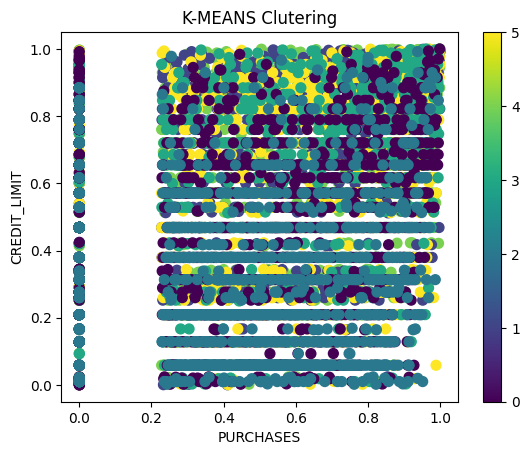

In [239]:
fig =plt.figure()

ax = fig.add_subplot(111)

scatter = ax.scatter (new_df ['PURCHASES'] , new_df ["CREDIT_LIMIT"] , c= clusters2[0], s=50)

ax.set_title("K-MEANS Clutering")

ax.set_xlabel("PURCHASES")

ax.set_ylabel("CREDIT_LIMIT")

plt.colorbar(scatter)

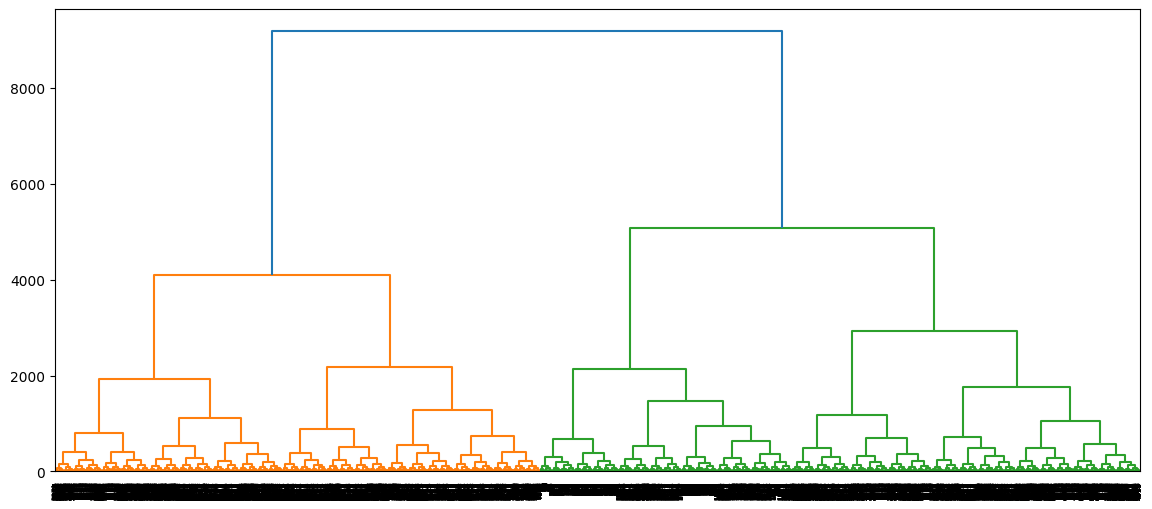

In [229]:
Z = linkage(new_df, method='complete')
distances = Z[:, 2]

plt.figure(figsize=(14,6))
dendrogram(Z)
plt.show()

In [230]:
# THE BEST K VALUE 

sum_of_squared_distances = []
K = range(2,20)

for k in K :
    km1 = KMeans(n_clusters=k)
    km1 = km1.fit(new_df)
    sum_of_squared_distances.append(km1.inertia_)

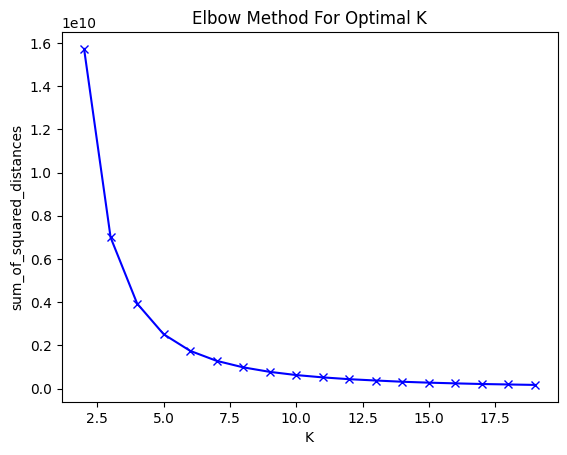

In [231]:
plt.plot(K , sum_of_squared_distances ,'bx-')
plt.xlabel('K')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal K')
plt.show()

In [232]:
k_means = KMeans(n_clusters=4 )
k_means.fit(new_df)

KMeans(n_clusters=4)

In [240]:
clust_labels3 = k_means.labels_

In [241]:
clusters3 = pd.DataFrame(clust_labels2)
clusters3

,0
0,4
1,4
2,4
3,4
4,4
...,...
8943,2
8944,2
8945,2
8946,2


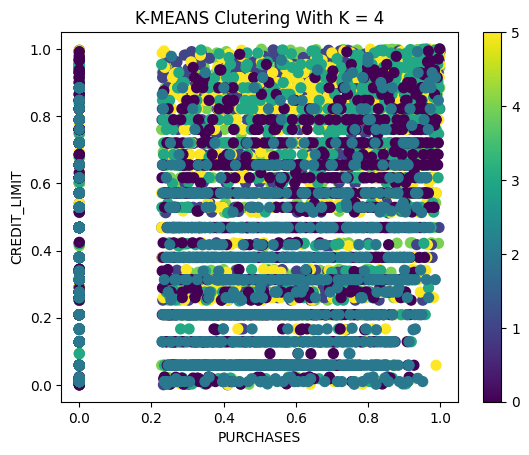

In [243]:
fig =plt.figure()

ax = fig.add_subplot(111)

scatter = ax.scatter (new_df ['PURCHASES'] , new_df ["CREDIT_LIMIT"] , c= clusters3[0], s=50)

ax.set_title("K-MEANS Clutering With K = 4")

ax.set_xlabel("PURCHASES")

ax.set_ylabel("CREDIT_LIMIT")

plt.colorbar(scatter)

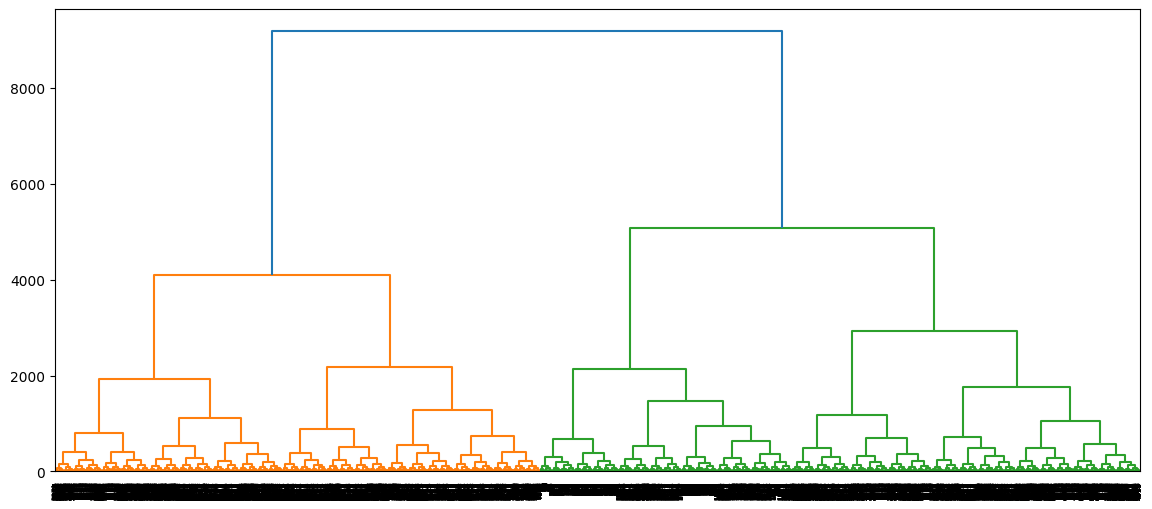

In [234]:
Z = linkage(new_df, method='complete')
distances = Z[:, 2]

plt.figure(figsize=(14,6))
dendrogram(Z)
plt.show()